<a href="https://colab.research.google.com/github/danacioDS/AI-ML-Edureka/blob/master/01_Logistic_Regression_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# 1. Import data

url = 'https://public.opendatasoft.com/explore/dataset/titanic-passengers/download/?format=csv&timezone=America/Santo_Domingo&lang=en&use_labels_for_header=true&csv_separator=%3B'

dataset = pd.read_csv(url, sep=';')

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [ ]:
dataset.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print("# of passangers in original data: " +str(len(dataset)))

# of passangers in original data: 891


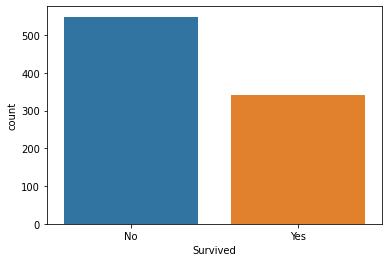

In [ ]:
# 2. Analize Data

sns.countplot(x='Survived', data=dataset)

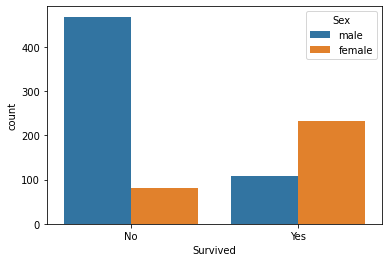

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=dataset)

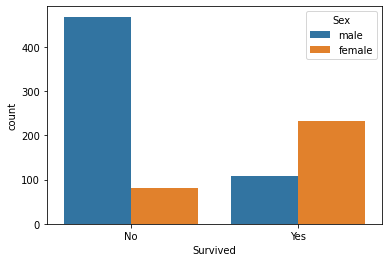

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=dataset)

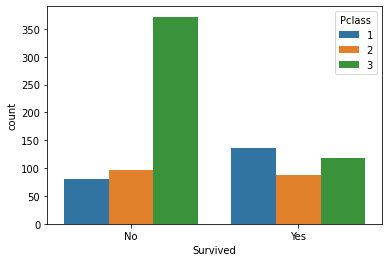

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=dataset)

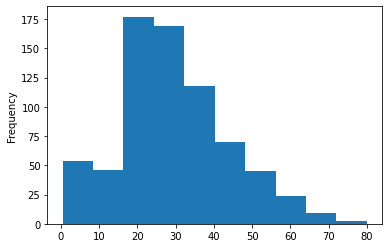

In [ ]:
dataset['Age'].plot.hist()

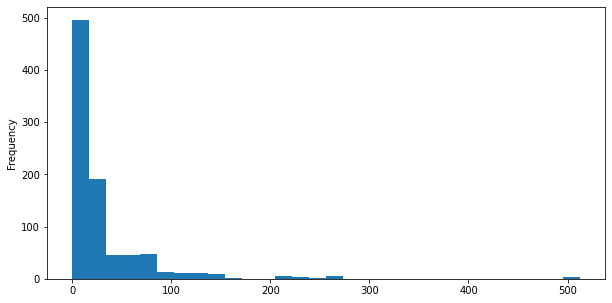

In [ ]:
dataset['Fare'].plot.hist(bins=30, figsize=(10,5))

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


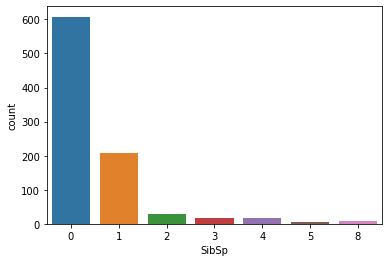

In [ ]:
sns.countplot(x='SibSp', data=dataset)

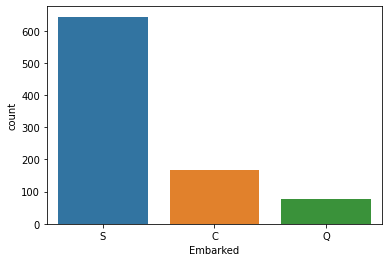

In [ ]:
sns.countplot(x='Embarked', data=dataset)

In [ ]:
# 3. Data Wrangling

dataset.isnull().count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

In [ ]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

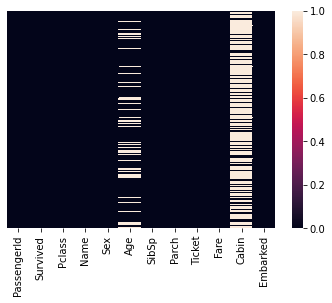

In [ ]:
sns.heatmap(dataset.isnull(), yticklabels=False)

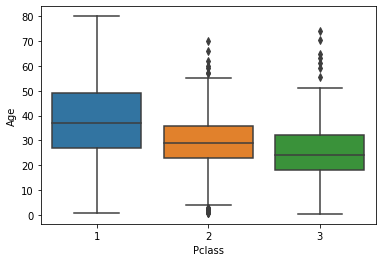

In [ ]:
sns.boxplot(x='Pclass', y='Age', data = dataset)

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [ ]:
dataset.drop('Cabin', axis=1, inplace=True)

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [ ]:
dataset.drop('Age', axis=1, inplace=True)

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,1,0,F.C. 12750,52.0000,S


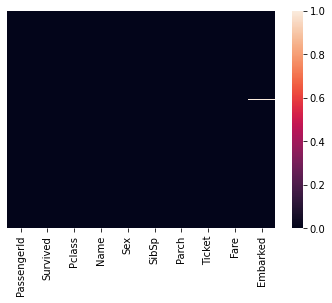

In [ ]:
sns.heatmap(dataset.isnull(), yticklabels=False)

In [ ]:
dataset.drop('Embarked', axis=1, inplace=True)

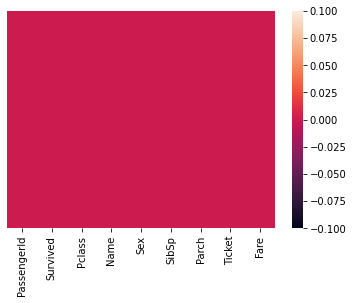

In [ ]:
sns.heatmap(dataset.isnull(), yticklabels=False)

In [ ]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [ ]:
# Turn string values into dummies

sex = pd.get_dummies(dataset['Sex'], drop_first=True)

sex.head()

,male
0,1
1,1
2,1
3,0
4,1


In [ ]:
datasetx = pd.concat([dataset, sex], axis=1)

datasetx.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,male
0,343,No,2,"Collander, Mr. Erik Gustaf",male,0,0,248740,13.0000,1
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,0,0,348123,7.6500,1
2,641,No,3,"Jensen, Mr. Hans Peder",male,0,0,350050,7.8542,1
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,0,4,349909,21.0750,0
4,672,No,1,"Davidson, Mr. Thornton",male,1,0,F.C. 12750,52.0000,1


In [ ]:
datasetx.drop(['Sex', 'Pclass', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

datasetx.head()

,Survived,SibSp,Parch,Fare,male
0,No,0,0,13.0000,1
1,No,0,0,7.6500,1
2,No,0,0,7.8542,1
3,No,0,4,21.0750,0
4,No,1,0,52.0000,1


In [ ]:
datasetx.describe()

,SibSp,Parch,Fare,male
count,891.000000,891.000000,891.000000,891.000000
mean,0.523008,0.381594,32.204208,0.647587
std,1.102743,0.806057,49.693429,0.477990
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.910400,0.000000
50%,0.000000,0.000000,14.454200,1.000000
75%,1.000000,0.000000,31.000000,1.000000
max,8.000000,6.000000,512.329200,1.000000


In [ ]:
y = datasetx['Survived']
X = datasetx.drop('Survived', axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SibSp   891 non-null    int64  
 1   Parch   891 non-null    int64  
 2   Fare    891 non-null    float64
 3   male    891 non-null    uint8  
dtypes: float64(1), int64(2), uint8(1)
memory usage: 21.9 KB


In [ ]:
y.describe()

count     891
unique      2
top        No
freq      549
Name: Survived, dtype: object

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n          No       0.79      0.87      0.83       106\n         Yes       0.77      0.66      0.71        73\n\n    accuracy                           0.78       179\n   macro avg       0.78      0.76      0.77       179\nweighted avg       0.78      0.78      0.78       179\n'

In [ ]:
confusion_matrix(y_test, prediction)

array([[92, 14],
       [25, 48]])

In [ ]:
accuracy_score(y_test, prediction)

0.7821229050279329